# Import Libraries, API Key and Data

## Import Libraries

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

## API Key

In [39]:
# Configure API key 
quandl.ApiConfig.api_key = 'miSUzac6jh5GAUoMTMkz'

## Import Data

In [7]:
# Creating a string of the path
# Define the path variable
path = r'/Users/douniaelyoussoufi/Achievement 6'
# Load the dataset file directly using os.path.join
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned.csv'))

In [9]:
df.head()

,Unnamed: 0,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
0,0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


# Data Subsetting

In [11]:
# Convert 'year' to datetime and rename it to 'Date'
df['Date'] = pd.to_datetime(df['year'], format='%Y')

In [34]:
# Find the minimum and the maximun years in the dataset
min_year = df['Date'].dt.year.min()
max_year = df['Date'].dt.year.max()

In [15]:
# Subset the dataset
df_subset = df[(df['Date'].dt.year >= min_year) & (df['Date'].dt.year <= max_year)].copy()

In [17]:
# Reset index
df_subset.reset_index(drop=True, inplace=True)

In [19]:
# Set 'Date' as the new index
df_subset.set_index('Date', inplace=True)

In [21]:
# Drop unnecessary columns
df_subset.drop(columns=['Unnamed: 0', 'year'], inplace=True)

In [74]:
# Display the cleaned subset
df_subset.head()

,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
Date,,,,,,,,,,,,,,
2001-01-01,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
2024-01-01,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2001-01-01,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
2001-01-01,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
1998-01-01,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


## Explanation of Data Subsetting Logic
I subset the data to include only records between the actual minimum and maximum years present in the dataset. This dynamic filtering ensures that all valid historical entries are included and that no arbitrary limits (e.g., fixed start or end years) are imposed.

By converting the year column to a datetime format and setting it as the index (Date), the dataframe is now structured appropriately for time-series analysis. This setup allows for better temporal analysis such as trends, seasonality, and year-over-year comparisons.

# Line Chart of Crop Yield Over Time

In [46]:
# Group by year and calculate the mean crop yield per year
yearly_yield = df_subset['crop_yield_mt_per_ha'].resample('Y').mean()

/var/folders/nw/29vt6gbs1rl2kd67ggkxdc7h0000gn/T/ipykernel_20009/2094407898.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_yield = df_subset['crop_yield_mt_per_ha'].resample('Y').mean()


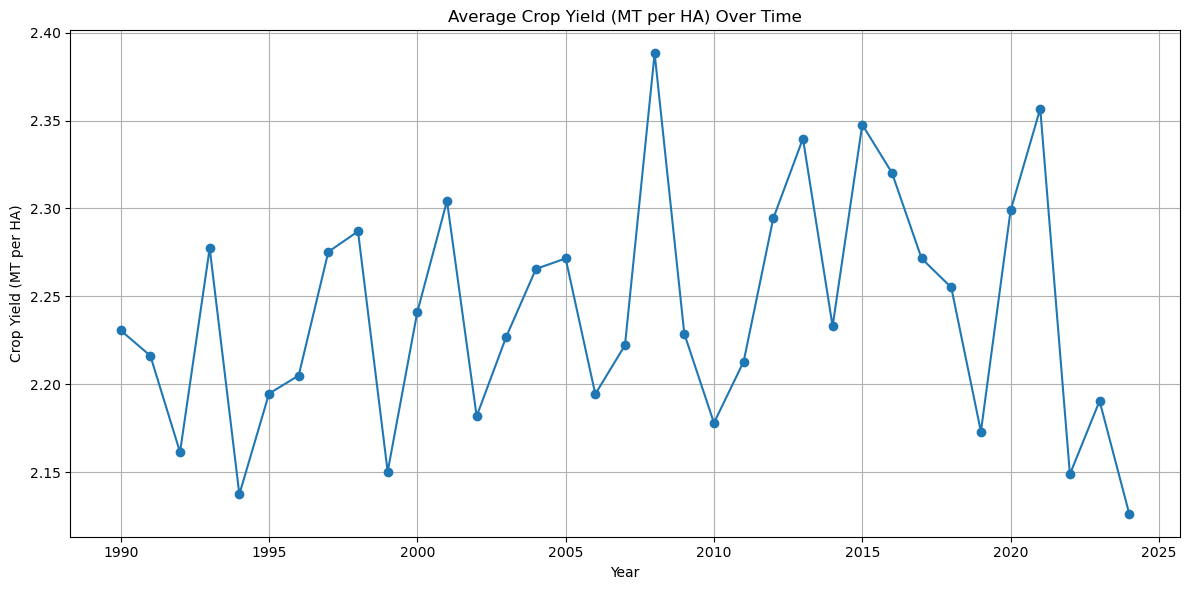

In [48]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_yield.index.year, yearly_yield, marker='o', linestyle='-')
plt.title('Average Crop Yield (MT per HA) Over Time')
plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Average Crop Yield Over Time (1990–2024)

This line plot shows the trend in **average crop yield (MT per hectare)** from 1990 to 2024. Key observations:

- **Overall Stability with Fluctuations**: While crop yields generally fluctuate year to year, the long-term trend appears relatively stable, ranging mostly between **2.15 and 2.35 MT/HA**.
- **No Clear Upward or Downward Trend**: There is no strong evidence of a consistent increase or decrease in yield over time, indicating that technological improvements or climate-related challenges may be offsetting each other.
- **Sharp Dips in Certain Years**: Significant drops occurred in years like **1993, 1999, and 2023–2024**, which may correlate with extreme weather events or changes in agricultural practices.
- **Peaks in Yield**: Notable peaks appear around **2007 and 2015**, suggesting periods of optimal growing conditions or effective adaptation strategies.

# Time-series analysis: decomposition

In [53]:
# Make sure the data I am decomposing is numeric
df_subset['crop_yield_mt_per_ha'] = pd.to_numeric(df_subset['crop_yield_mt_per_ha'], errors='coerce')

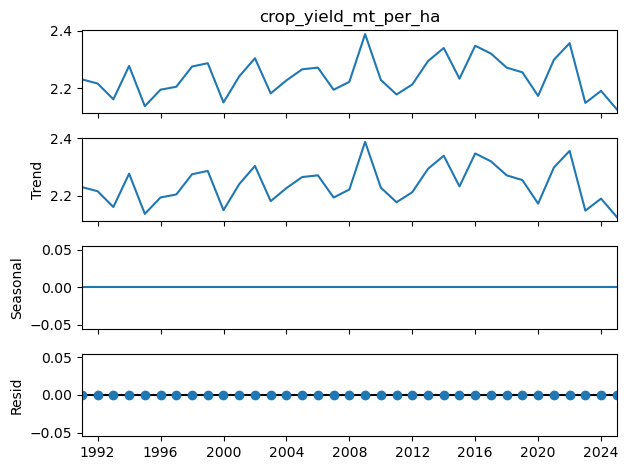

In [91]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_subset_resampled.dropna(), model='additive')
# Plot the decomposition components
decomposition.plot()
plt.show()

This decomposition plot breaks down the `crop_yield_mt_per_ha` time series into its three components using an **additive model**:

- **Trend**: The trend component shows mild fluctuations in crop yield over time, confirming a relatively stable long-term pattern without strong upward or downward movement.
- **Seasonal**: The seasonal component is flat (0), indicating no clear recurring seasonal pattern in the data. This makes sense for annual agricultural yield data where seasonality may not be expressed strongly at the yearly level.
- **Residual**: The residual (random noise) component is minimal, with very small deviations, suggesting that most of the variation is captured by the trend. However, this also implies that the decomposition may not be fully informative due to lack of seasonality and limited noise.

# Testing for stationarity

In [62]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the crop yield data (after resampling and dropping NaNs)
result = adfuller(df_subset_resampled.dropna())

# Print the test statistic, p-value, and critical values
test_statistic, p_value, used_lag, n_obs, critical_values, icbest = result

# Print the results
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

Test Statistic: -4.226048967388046
P-value: 0.0005951028212092249
Critical Values:
  1%: -3.6461350877925254
  5%: -2.954126991123355
  10%: -2.6159676124885216


### Dickey-Fuller Test Results

The Dickey-Fuller test was conducted to check for the stationarity of the crop yield data. The results are as follows:

- **Test Statistic**: -4.226
- **P-value**: 0.0006
- **Critical Values**:
  - 1%: -3.646
  - 5%: -2.954
  - 10%: -2.616

#### Interpretation:
- The **p-value** (0.0006) is significantly smaller than the 0.05 threshold, so we can reject the null hypothesis that the data has a unit root (non-stationary).
- The **test statistic** (-4.226) is more negative than the 5% critical value (-2.954), which further supports rejecting the null hypothesis.
  
This indicates that the crop yield data is **stationary**, and there is no evidence of a unit root in the series. This allows us to proceed with further analysis of the relationship between crop yield and economic impact in agriculture.

#### Null Hypothesis:
The null hypothesis in the Dickey-Fuller test is that the data is **non-stationary**, meaning it has a unit root and trends over time. Since we rejected this hypothesis, we conclude that the crop yield data is stationary and suitable for further analysis.

#### Connection to Research:
The stationarity of crop yield data is crucial for our analysis, as we hypothesize that **higher crop yields are strongly associated with higher economic impact in agriculture**. Since the data is stationary, we can now explore how changes in crop yield influence economic impacts over time.

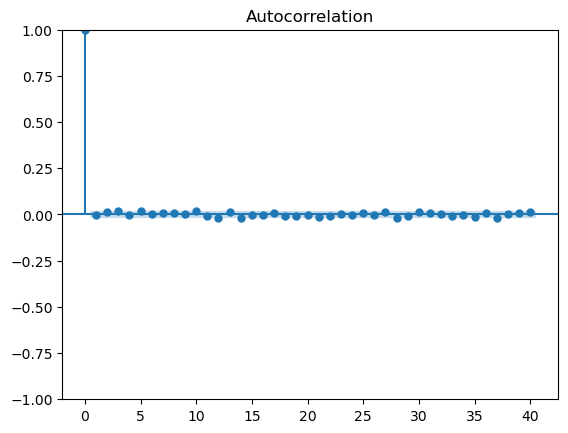

In [67]:
# Check out a plot of autocorrelations
# Select only the numeric column for autocorrelation plot
numeric_data = df_subset['crop_yield_mt_per_ha']
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(numeric_data)
plt.show()

# Model the Impact of Crop Yield on Economic Impact (Regression)

In [85]:
# Prepare data for regression
X = df_subset['crop_yield_mt_per_ha']
y = df_subset['economic_impact_million_usd']

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     economic_impact_million_usd   R-squared:                       0.528
Model:                                     OLS   Adj. R-squared:                  0.528
Method:                          Least Squares   F-statistic:                 1.117e+04
Date:                         Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                                 01:10:33   Log-Likelihood:                -70712.
No. Observations:                        10000   AIC:                         1.414e+05
Df Residuals:                             9998   BIC:                         1.414e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4135      7.001     -0.202      0.840     -15.136      12.309
crop_yield_mt_per_ha   301.6420      2.855    105.670      0.000     296.046     307.238
==============================================================================
Omnibus:                        0.633   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.643
Skew:                           0.019   Prob(JB):                        0.725
Kurtosis:                       2.992   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Analysis Summary: Crop Yield vs. Economic Impact

**Objective:**  
To test the hypothesis that *higher crop yields are strongly associated with higher economic impact in agriculture*.

---

### Model Overview

| Metric                       | Value                          |
|-----------------------------|--------------------------------|
| **Dependent Variable**      | `economic_impact_million_usd` |
| **Independent Variable**    | `crop_yield_mt_per_ha`         |
| **Model Type**              | OLS (Ordinary Least Squares)   |
| **Number of Observations**  | 10,000                         |

---

### Key Results

| Statistic                    | Value     | Interpretation |
|-----------------------------|-----------|----------------|
| **R-squared**               | **0.528** | About 53% of the variance in economic impact is explained by crop yield alone. |
| **Coefficient (Crop Yield)**| **301.64** | Each 1 MT/HA increase in crop yield is associated with a \$301.64 million increase in economic impact. |
| **P-value (Crop Yield)**    | **0.000** | Highly statistically significant (strong evidence against the null hypothesis). |
| **Intercept (Const)**       | -1.41     | Not statistically significant (p = 0.84); can be interpreted as the baseline economic impact when yield is zero. |
| **F-statistic**             | Very high | Indicates the model is a strong overall fit. |
| **Durbin-Watson**           | 2.025     | Suggests no autocorrelation in residuals (ideal is ~2). |

---

### Interpretation & Implication

The regression analysis confirms the hypothesis:

 **Crop yield is a strong and significant predictor of economic impact in agriculture.**

This suggests that agricultural policies or innovations aimed at improving crop yields are likely to result in substantial economic gains.
